<a href="https://colab.research.google.com/github/kimdongha723/kdh723/blob/main/BTC_predict_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyupbit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 KB 7.5 MB/s eta 0:00:00


In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 44.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pystan: filename=pystan-2.19.1.1-cp39-cp39-linux_x86_64.whl size=61826161 sha256=248dc1445b24c2889cd146233893bd8233925222a081be231bd1cbaa127c6351
  Stored in directory: /root/.cache/pip/wheels/b8/36/bf/7ec7e363f796373cea3eb9ea94e83f5bbbb586d2edbf7e3417
Successfully built pystan
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 KB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=9436506 sha256=5afa553ef1717c72f2561deac39c43525325ec1d486b578d0497c6492913ef77
  Stored in directory: /root/.cache/pip/wheels/da/a4/bb/dbed5db92b2183a753dd96cc8a56706a61484ff3959988

In [ ]:
import pyupbit

In [155]:
#BTC 최근 200시간의 데이터 불러옴
df = pyupbit.get_ohlcv("KRW-btc", interval="minute30")
df

,open,high,low,close,volume,value
2023-04-01 08:00:00,37697000.0,37700000.0,37615000.0,37632000.0,92.394880,3.480073e+09
2023-04-01 08:30:00,37638000.0,37641000.0,37519000.0,37540000.0,100.898710,3.791145e+09
2023-04-01 09:00:00,37540000.0,37658000.0,37523000.0,37650000.0,182.911251,6.876950e+09
2023-04-01 09:30:00,37626000.0,37650000.0,37543000.0,37614000.0,89.843072,3.377142e+09
2023-04-01 10:00:00,37614000.0,37626000.0,37570000.0,37605000.0,62.918773,2.366197e+09
...,...,...,...,...,...,...
2023-04-05 09:30:00,37225000.0,37780000.0,37210000.0,37763000.0,449.325269,1.686682e+10
2023-04-05 10:00:00,37764000.0,37804000.0,37551000.0,37630000.0,240.573600,9.061166e+09
2023-04-05 10:30:00,37620000.0,37665000.0,37600000.0,37604000.0,108.131161,4.069474e+09
2023-04-05 11:00:00,37604000.0,37720000.0,37596000.0,37661000.0,134.567975,5.068611e+09


In [156]:
#시간(ds)와 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2023-04-01 08:00:00,37632000.0
1,2023-04-01 08:30:00,37540000.0
2,2023-04-01 09:00:00,37650000.0
3,2023-04-01 09:30:00,37614000.0
4,2023-04-01 10:00:00,37605000.0
...,...,...
195,2023-04-05 09:30:00,37763000.0
196,2023-04-05 10:00:00,37630000.0
197,2023-04-05 10:30:00,37604000.0
198,2023-04-05 11:00:00,37661000.0


In [157]:
#prophet 불러옴
from fbprophet import Prophet

In [158]:
#학습
model = Prophet()
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [161]:
#24시간 미래 예측
future = model.make_future_dataframe(periods=15, freq='H')
forecast = model.predict(future)

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


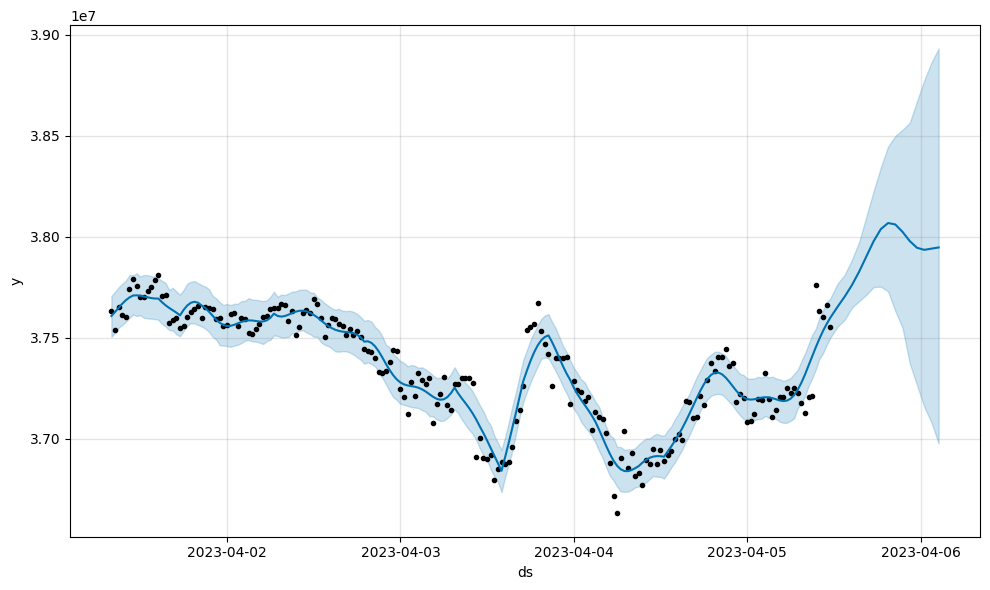

In [162]:
#그래프1
fig1 = model.plot(forecast)

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


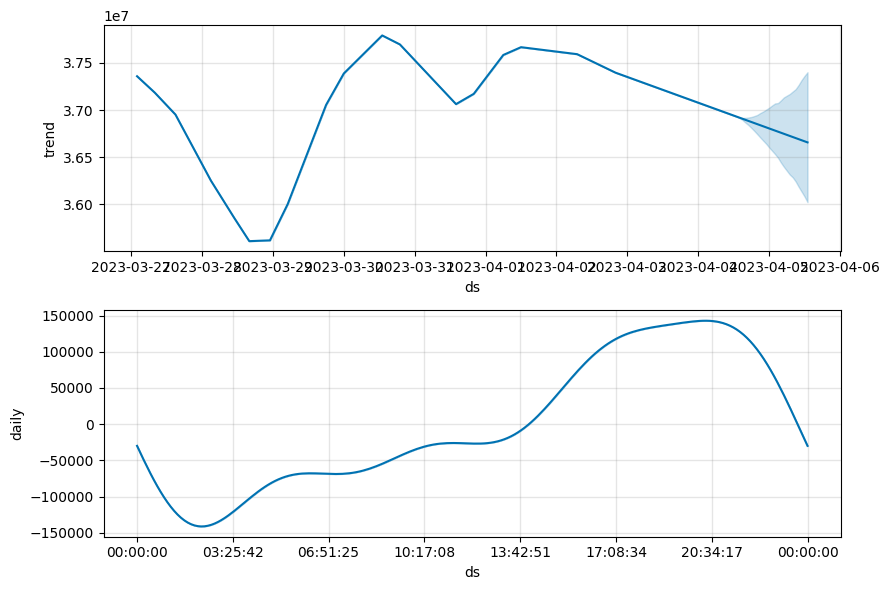

In [ ]:
#그래프2
fig2 = model.plot_components(forecast)